# Importing Packages

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
from scipy.special import boxcox1p
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer



In [2]:
import sys
print(sys.executable)

/home/naruto_uzumaki/Pet_Projects/env/bin/python3.8


In [3]:
from Utils.helpers import *

## Reading Train and test data 

In [4]:
test_data = pd.read_csv("~/Pet_Projects/House_price_predictions/house-prices-raw/test.csv")
train_data = pd.read_csv("~/Pet_Projects/House_price_predictions/house-prices-raw/train.csv")
print("Train_data_head")
train_y = train_data['SalePrice']
train_x = train_data.drop('SalePrice',1)
test_x = test_data
df_prepare = pd.concat([train_x,test_x]).reset_index(drop = True) 
df_prepare.drop('Id',1,inplace=True)
len(train_x.columns)
#df_prepare

Train_data_head


80

## Missing Data Distribution 

In [5]:
df_prepare

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
dtype: float64


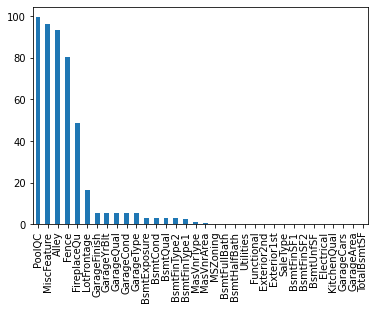

In [6]:
missing_data_distribution(df_prepare)

In [7]:
## PoolQC , Alley , Fence , MiscFeature ,FireplaceQu Missing for more than 50% of the data 
columns_to_be_dropped = ['MiscFeature']


## Seperating  Numeric and CategoricalData

In [8]:
numeric_data,categorical_data = seperating_data(df_prepare)

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0       706.0         0.0  ...       548.0   
1          1976         0.0       978.0         0.0  ...       460.0   
2          2002       162.0       486.0         0.0  ...       608.0   
3          1970         0.0       216.0         0.0  ...       642.0   
4          2000       350.0       655.0         0.0  ...       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61     

## Impute missing values using SimpleImputer (Mean Value)

In [9]:
numeric_data = numerical_impute(numeric_data)

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [10]:
new_data_2 = categorical_data.copy()
#a = categorical_impute(new_data_2)
#print(a)
# encode_data

In [11]:
## Feature Engineering Ideas :: Age of the house


## Concat both numerical and categorical data

In [12]:
df_imputed = pd.concat([numeric_data.reset_index(drop=True), categorical_data], axis=1)
df_imputed.fillna('None', inplace = True) 
missing_new = df_imputed.isnull().sum()
missing_new.sort_values(ascending=False,inplace=True)
missing_new.head(100)

SaleCondition    0
OpenPorchSF      0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
                ..
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
MSSubClass       0
Length: 79, dtype: int64

In [13]:
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import PowerTransformer

In [14]:
(df_imputed['MasVnrArea']==0).value_counts()

True     1738
False    1181
Name: MasVnrArea, dtype: int64

In [15]:
dt_final=numericorcategorical(df_imputed)
print(dt_final.head())

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
MSZoning


/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition
   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0      0.0          7.0          5.0     2003.0   
1        20.0         80.0      0.0          6.0          8.0     1976.0   
2        60.0         68.0      0.0          7.0          5.0     2001.0   
3        70.0         60.0      0.0          7.0          5.0     1915.0   
4        60.0         84.0      0.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_6  \
0        2003.0    1.232972   

# Developing Model Functions :: 

In [16]:
# from sklearn.model_selection import train_test_split

# def train_test_split(X,y,size)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = 0)
#     return X_train, X_test, y_train, y_test


In [17]:
# space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
#         'gamma': hp.uniform ('gamma', 1,9),
#         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
#         'reg_lambda' : hp.uniform('reg_lambda', 0,1),
#         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
#         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
#         'n_estimators': 180,
#         'seed': 0
#     }

In [18]:
# def objective(space):
#      qclf=xgb.XGBClassifier(
#                     n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
#                     reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
#                     colsample_bytree=int(space['colsample_bytree']))
    
#     evaluation = [( X_train, y_train), ( X_test, y_test)]
    
#     clf.fit(X_train, y_train,
#             eval_set=evaluation, eval_metric="auc",
#             early_stopping_rounds=10,verbose=False)
    

#     pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, pred>0.5)
#     print ("SCORE:", accuracy)
#     scores = {'loss': -accuracy, 'status': STATUS_OK }
#     return scores  

In [19]:
## preparing for data selection ::

In [20]:
length = len(train_x)


In [21]:
len(dt_final)
Train , Test = dt_final.loc[:length - 1,:] , dt_final.loc[length:,:]
Train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_6', 'SaleType_7', 'SaleType_8', 'SaleType_9',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=310)

In [22]:
X = Train.loc[:,:].values
y = np.log(train_y.values)


In [26]:
Train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_6', 'SaleType_7', 'SaleType_8', 'SaleType_9',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=310)

In [24]:
print(Test.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_6', 'SaleType_7', 'SaleType_8', 'SaleType_9',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=310)


# Using XGboost for Regression

In [ ]:
## https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f


In [ ]:
test_M = Test.loc[:,:].values

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1, random_state=42)


In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dtest_actual = xgb.DMatrix(test_M)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))


In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
num_boost_round = 999

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))
print("Params Defn ".format(params))

In [ ]:
params

## Using XGBoost’s CV

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
print(cv_results)
print(cv_results['test-mae-mean'].min())

## Parameters max_depth and min_child_weight

In [ ]:
params

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]


## Parameters subsample and colsample_bytree

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

## Parameter ETA

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))    


In [ ]:
params['eta'] = best_params

# Results

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
print(mean_absolute_error(best_model.predict(dtest), y_test))
print(len(y_test))
print(mean_absolute_error(best_model.predict(dtest), y_test)/len(y_test))


In [ ]:
print(mean_absolute_error(np.exp(best_model.predict(dtest)), np.exp(y_test)))
print(len(y_test))
print(mean_absolute_error(np.exp(best_model.predict(dtest)), np.exp(y_test))/len(y_test))


In [ ]:
y_pred_actual = np.exp(best_model.predict(dtest))
y_test_actual = np.exp(y_test)
#error = y_pred - y_test
error = y_pred_actual - y_test_actual
#print(y_test)
#print(y_test_actual)
print(error)
#np.exp(y_pred)
#print(error.min())
#print(error.max())
#print(error.std())
binwidth = (error.max() - error.min()) / 50
#plt.hist(error, bins=np.arange(min(error), max(error) + binwidth, binwidth))
#error
sns.distplot(error , fit=norm)

In [ ]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred_actual, y_test_actual)


In [ ]:
import os
os.getcwd()


In [ ]:
best_model.save_model("my_model_xgb.model")


In [ ]:
dtest

In [ ]:
print(dtest_actual)

In [ ]:
y_pred_actual = pd.DataFrame(np.exp(best_model.predict(dtest_actual)))
#type(y_pred_actual)
print(y_pred_actual.head())
y_pred_actual.columns = ['SalePrice']
y_pred_actual.to_csv("~/Pet_Projects/House_price_predictions/house-prices-raw/first_submission.csv")

In [ ]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model_xgb.model")
# And use it for predictions.
loaded_model.predict(dtest)

## LGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [ ]:
# %%
def LGBFineTuning(X_train, Y_train , X_dev ,Y_dev ,N_FOLDS = 3):
    #X_train,Y_train,X_dev,Y_dev = train_test_split(X, y, test_size=0.10, random_state=1)
    d_train = lgb.Dataset(X_train, label = Y_train)
    d_valid = lgb.Dataset(X_dev, label = Y_dev)

    parameters = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 1000,
    "early_stopping_rounds": 100
    }

    
    model = lgb.train(parameters, d_train, valid_sets = d_valid)
    params = {}
    params['max_bin'] = 10
    params['learning_rate'] = 0.4 # shrinkage_rate
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'regression'
    params['metric'] = 'mae'          # or 'mae'
    params['sub_feature'] = 0.50      # feature_fraction 
    params['bagging_fraction'] = 0.85 # sub_row
    params['bagging_freq'] = 40
    params['num_leaves'] = 512        # num_leaf
    params['min_data'] = 500         # min_data_in_leaf
    params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf
    params['verbose'] = 0
    cv_results = lgb.cv(parameters, d_train,stratified=False)
    #mean_mae = cv_results['test-mae-mean'].min()
    #boost_rounds = cv_results['test-mae-mean'].argmin()
    #print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    #print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    #preds = model.predict(X_dev)
    print(params)
    return cv_results



In [ ]:
test_cv_results = LGBFineTuning(X_train, y_train , X_test ,y_test ,N_FOLDS = 3)


In [ ]:
params = {}
params['max_bin'] = 10
params['learning_rate'] = 0.4 # shrinkage_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'          # or 'mae'
params['sub_feature'] = 0.50      # feature_fraction 
params['bagging_fraction'] = 0.85 # sub_row
params['bagging_freq'] = 40
params['num_leaves'] = 512        # num_leaf
params['min_data'] = 500         # min_data_in_leaf
params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf
params['verbose'] = 0


In [ ]:
params

In [ ]:
test_cv_results

In [ ]:
  parameters = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 1000,
    "early_stopping_rounds": 100
    }


In [ ]:
## Parameters pairing 
# "max_depth": 8, 4-  8 
# "num_leaves": 128,  <    
